In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_folder = '/content/drive/MyDrive/TransformersCode/05-Service_Center/'

photos_folder=working_folder + 'photos/'

In [ ]:
classes_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

In [ ]:
model_id='google/vit-base-patch16-224-in21k'

In [ ]:
import torch
import torch.nn as nn
from transformers import ViTModel
from transformers import ViTImageProcessor
from transformers.modeling_outputs import SequenceClassifierOutput

In [ ]:
class ViTForImageClassification(nn.Module):

    def __init__(self, num_labels=7):

        super(ViTForImageClassification, self).__init__()

        self.vit = ViTModel.from_pretrained(model_id)

        self.dropout = nn.Dropout(0.1)

        self.classifier = nn.Linear(self.vit.config.hidden_size, num_labels)

        self.num_labels = num_labels

    def forward(self, pixel_values, labels=None):

        outputs = self.vit(pixel_values=pixel_values)

        output = self.dropout(outputs.last_hidden_state[:, 0])

        logits = self.classifier(output)
        if labels is not None:

          if isinstance(labels, list):
            labels = torch.tensor(labels, dtype=torch.long, device=logits.device)

          loss_fct = nn.CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

          return SequenceClassifierOutput(
              loss=loss,
              logits=logits,
              hidden_states=outputs.hidden_states,
              attentions=outputs.attentions
          )
        else:
          return logits

In [ ]:
model = ViTForImageClassification()

model = torch.load(working_folder + 'ViT_fine_Tuned_FED', map_location=torch.device('cpu'))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

<ipython-input-7-399cf4874d35>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(working_folder + 'ViT_fine_Tuned_FED', map_location=torch.device('cpu'))


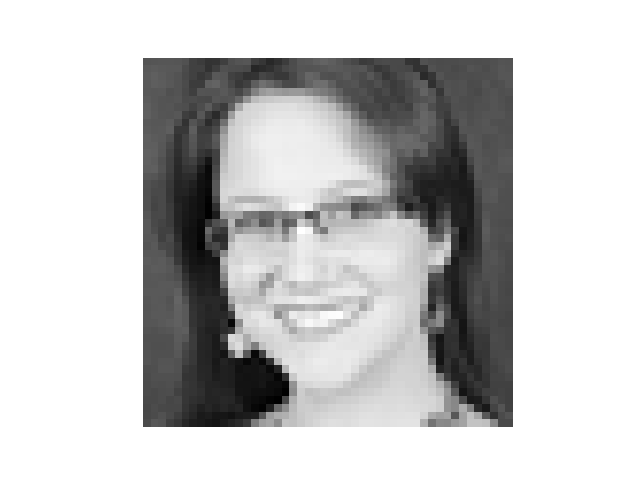

In [ ]:
from PIL import Image

image_path = photos_folder+'Happiness7.png'

image = Image.open(image_path).convert('RGB')
image

In [ ]:
import numpy as np

image_np = np.array(image)

In [ ]:
processor = ViTImageProcessor.from_pretrained(model_id)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
inputs = processor(images=image_np, return_tensors="pt")

In [ ]:
logits = model(**inputs)
logits

tensor([[-0.6516, -0.5549, -0.9389,  4.0405, -0.8784, -0.4443, -0.3362]],
       grad_fn=<AddmmBackward0>)

In [ ]:
predicted_index = torch.argmax(logits, dim=1).item()

predicted_index

3

In [ ]:
classes_names[predicted_index]

'Happiness'

In [ ]:
def classify_image(image_path):

  image = Image.open(image_path).convert('RGB')

  image_np = np.array(image)

  inputs = processor(images=image_np, return_tensors="pt")

  logits = model(**inputs)

  predicted_index = torch.argmax(logits, dim=1).item()

  return classes_names[predicted_index]

In [ ]:
image_path = photos_folder + 'Fear2.png'

classified = classify_image(image_path)
classified

'Fear'